# Importing the libraries

In [2]:
import seaborn as sns
import pandas as pd

# Loading the Dataset

In [3]:
df=sns.load_dataset("titanic")
df.head() # print the top five rows

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Shape of the Dataset

In [4]:
df.shape

(891, 15)

# Identifying the Datatypes

In [5]:
datainfo=pd.DataFrame(df.dtypes)
datainfo.rename(columns={0:'Datatype'},inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
df.sample(5) # random 5 rows of the data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
458,1,2,female,50.0,0,0,10.5000,S,Second,woman,False,NaN,Southampton,yes,True
141,1,3,female,22.0,0,0,7.7500,S,Third,woman,False,NaN,Southampton,yes,True
360,0,3,male,40.0,1,4,27.9000,S,Third,man,True,NaN,Southampton,no,False
39,1,3,female,14.0,1,0,11.2417,C,Third,child,False,NaN,Cherbourg,yes,False
853,1,1,female,16.0,0,1,39.4000,S,First,woman,False,D,Southampton,yes,False


In [8]:
datainfo['missing']=df.isnull().sum() # finding the null values in each column
datainfo

,Datatype,missing
survived,int64,0
pclass,int64,0
sex,object,0
age,float64,177
sibsp,int64,0
parch,int64,0
fare,float64,0
embarked,object,2
class,category,0
who,object,0


In [9]:
datainfo['unique']=df.nunique()
datainfo

,Datatype,missing,unique
survived,int64,0,2
pclass,int64,0,3
sex,object,0,2
age,float64,177,88
sibsp,int64,0,7
parch,int64,0,7
fare,float64,0,248
embarked,object,2,3
class,category,0,3
who,object,0,3


In [10]:
datainfo['count']=df.count()
datainfo

,Datatype,missing,unique,count
survived,int64,0,2,891
pclass,int64,0,3,891
sex,object,0,2,891
age,float64,177,88,714
sibsp,int64,0,7,891
parch,int64,0,7,891
fare,float64,0,248,891
embarked,object,2,3,889
class,category,0,3,891
who,object,0,3,891


# Part I: Frequency Table
## Task 1: Frequency Table of Categorical Variable

In [11]:
freq_table=df['pclass'].value_counts().sort_index().rename({1:'First',2:'Second',3:'Third'}).to_frame("Absolute Frequency")

In [12]:
freq_table['Relative Frequency']=(freq_table['Absolute Frequency']/freq_table['Absolute Frequency'].sum())*100

In [13]:
freq_table['Cumulative Frequency']=freq_table['Absolute Frequency'].cumsum()

In [14]:
freq_table=freq_table.reset_index()
freq_table.columns=['Class','Absolute Frequency','Relative Frequency (%)','Cumulative Frequency']

In [15]:
print(freq_table)

    Class  Absolute Frequency  Relative Frequency (%)  Cumulative Frequency
0   First                 216               24.242424                   216
1  Second                 184               20.650954                   400
2   Third                 491               55.106622                   891


## 1. Barplot

<Axes: xlabel='Class', ylabel='Absolute Frequency'>

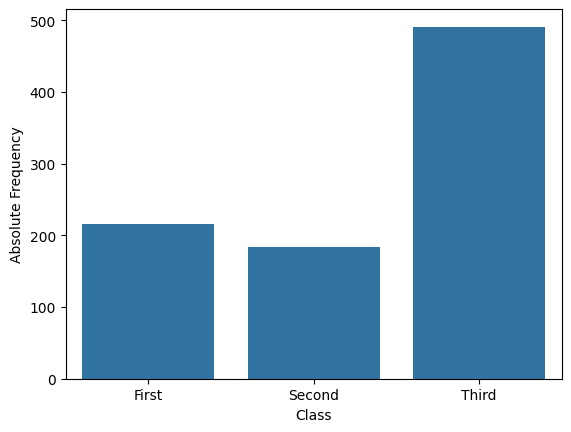

In [16]:
sns.barplot(x='Class',y='Absolute Frequency',data=freq_table)

In [17]:
two_way_table=pd.crosstab(df['sex'],df['survived'],margins=True)

In [18]:
two_way_table.columns=['Survived = 0','Survived = 1','Total']

In [19]:
two_way_table.index.name='Sex'

In [20]:
two_way_table.rename(index={'All':'Total'},inplace=True)

In [21]:
two_way_table

,Survived = 0,Survived = 1,Total
Sex,,,
female,81,233,314
male,468,109,577
Total,549,342,891


## 2. Heatmap

<Axes: ylabel='Sex'>

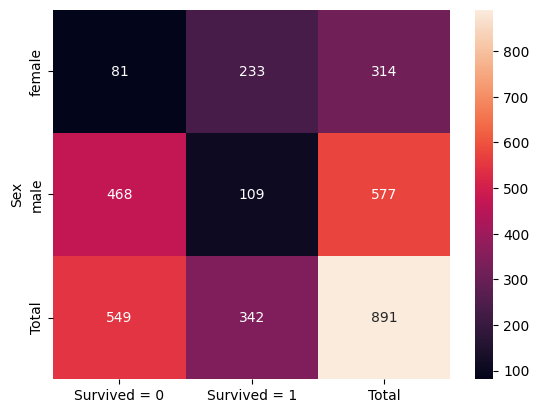

In [22]:
sns.heatmap(two_way_table,annot=True,fmt='g')

## Joint Probability

In [23]:
joint_prob=len(df[(df['sex']=='female')&(df['survived']==1)])/len(df)

In [24]:
joint_prob

0.2615039281705948

# Part II: Joint, Marginal, and Conditional Probabilities
## Task 2: Two-Way Table of sex vs survived

### Marginal Probability

In [25]:
marginal_prob=len(df[df['sex']=='female'])/len(df)

In [26]:
marginal_prob

0.35241301907968575

In [27]:
p_survived=len(df[df['survived'] == 1]) / len(df)

In [28]:
p_survived

0.3838383838383838

### Conditional Probability

In [29]:
p_survived_given_female=len(df[(df['sex']=='female')&(df['survived']==1)])/len(df[df['sex']=='female'])

In [30]:
p_survived_given_female

0.7420382165605095

In [31]:
df[df['survived']==1]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [32]:
p_female_given_survived=len(df[(df['sex']=='female')&(df['survived']==1)])/len(df[df['survived']==1])

In [33]:
p_female_given_survived

0.6812865497076024

# Part III: Correlation Analysis

In [34]:
df['age'].isnull().sum()

np.int64(177)

In [35]:
df['fare'].isnull().sum()

np.int64(0)

In [36]:
df['age_imputed']=df['age']

In [37]:
df['age_imputed'].fillna(df['age'].mean(),inplace=True)

/tmp/ipython-input-369825111.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age_imputed'].fillna(df['age'].mean(),inplace=True)


/tmp/ipython-input-3221129567.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'],color='blue',label='Original Age',kde=True,hist=False)
/tmp/ipython-input-3221129567.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age_imputed'],color='orange',label='Imputed A

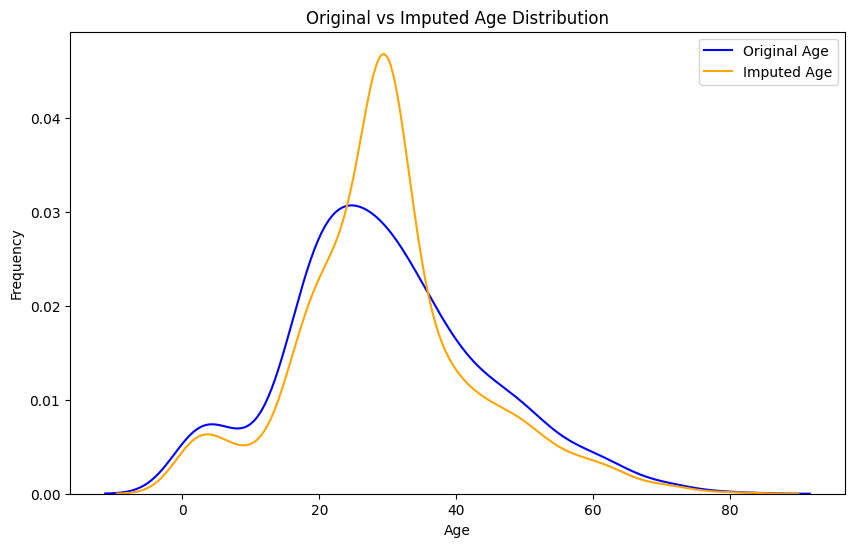

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.distplot(df['age'],color='blue',label='Original Age',kde=True,hist=False)
sns.distplot(df['age_imputed'],color='orange',label='Imputed Age',kde=True,hist=False)
plt.title('Original vs Imputed Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Pearson Coeff between Age and Fare

In [42]:
import math
import pandas as pd

def pearson_corr(x, y):
    pairs = [(a, b) for a, b in zip(x, y) if not (pd.isna(a) or pd.isna(b))]
    if len(pairs) == 0:
        return float('nan')

    x, y = zip(*pairs)
    n = len(x)
    mean_x = sum(x) / n
    mean_y = sum(y) / n

    num = sum((x[i] - mean_x) * (y[i] - mean_y) for i in range(n))

    den_x = sum((x[i] - mean_x)**2 for i in range(n))
    den_y = sum((y[i] - mean_y)**2 for i in range(n))
    den = math.sqrt(den_x * den_y)

    return num / den if den != 0 else float('nan')

r = pearson_corr(df['age'], df['fare'])
print(f"Pearson Correlation Coefficient: {r:.4f}")


Pearson Correlation Coefficient: 0.0961


In [43]:
df['age_bin'] = pd.cut(df['age_imputed'], bins=50)
df['fare_bin'] = pd.cut(df['fare'], bins=50)

In [44]:
pivot_table=pd.crosstab(df['age_bin'],df['fare_bin'])

# Heatmap

Text(120.72222222222221, 0.5, 'Age Bin')

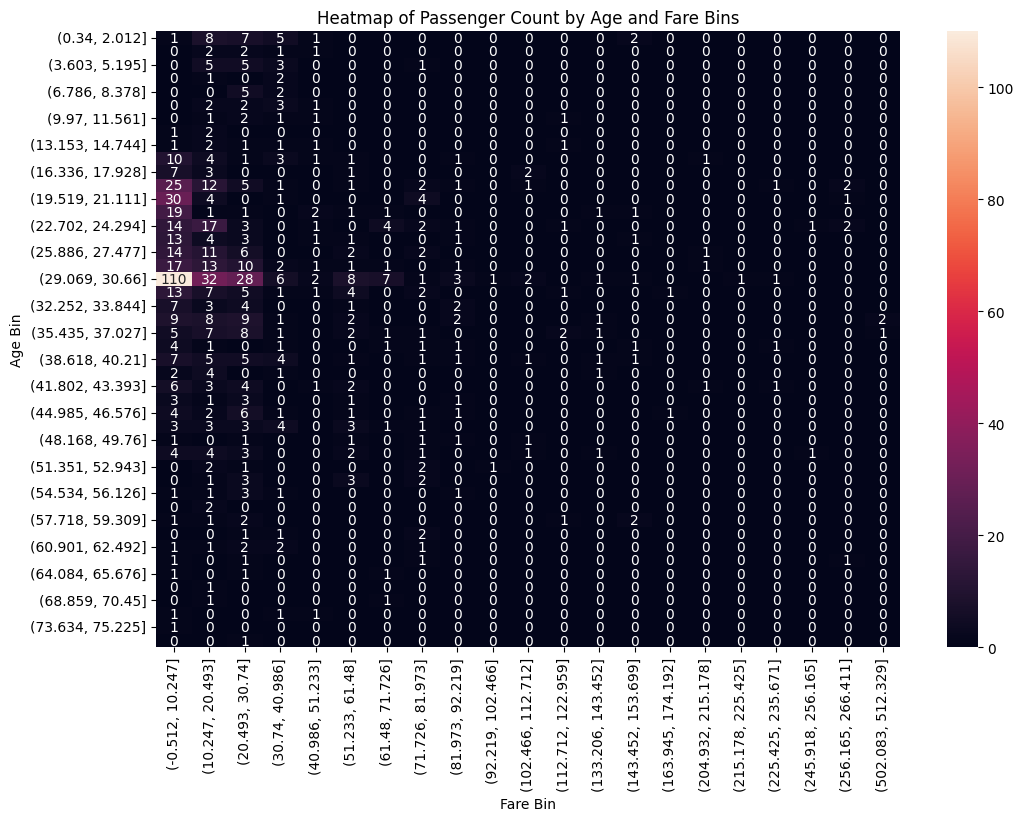

In [45]:
plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, annot=True, fmt='d')
plt.title('Heatmap of Passenger Count by Age and Fare Bins')
plt.xlabel('Fare Bin')
plt.ylabel('Age Bin')

<Axes: xlabel='age_imputed', ylabel='Count'>

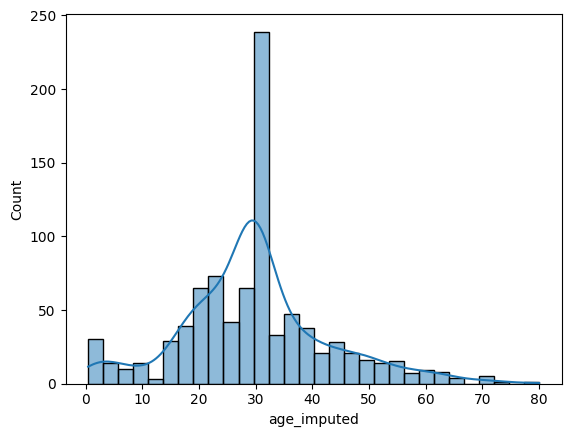

In [46]:
sns.histplot(x='age_imputed',data=df,kde=True)

# Scatterplot

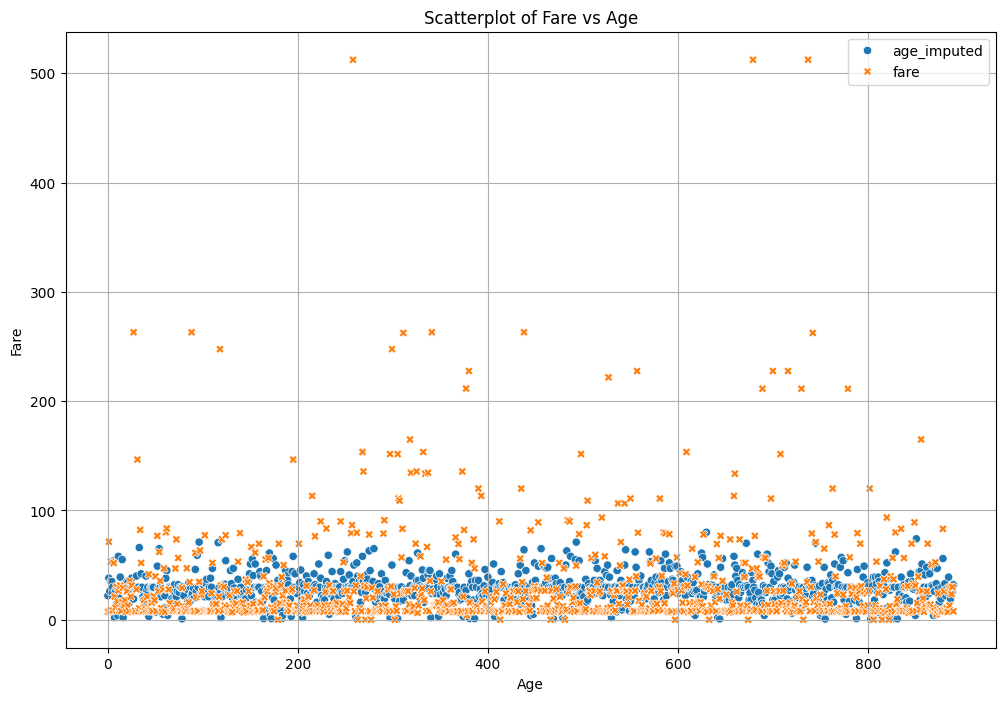

In [47]:
plt.figure(figsize=(12,8))
sns.scatterplot(df[['age_imputed','fare']])
plt.title('Scatterplot of Fare vs Age')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

## Task 5: Interpretation

In [48]:
# correlation between age and fare comes out to be 0.09156609328505762
# that shows a very weak correlation between these features and there is no linear realtionship between them
# further, a positive sign suggests a weak positive correlation

<Axes: xlabel='class', ylabel='survived'>

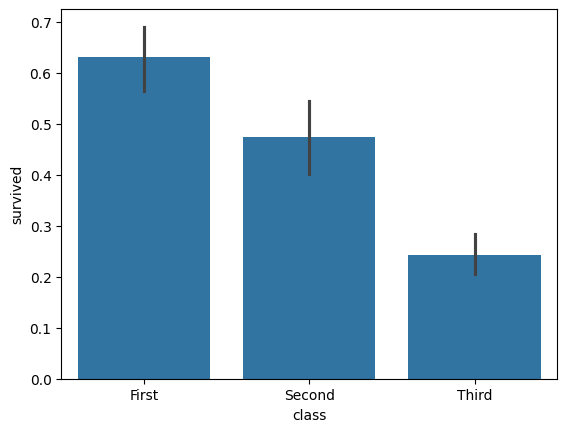

In [49]:
sns.barplot(x='class',y='survived',data=df)

In [50]:
# As the barplot suggests, the survival of the first class passengers were the most

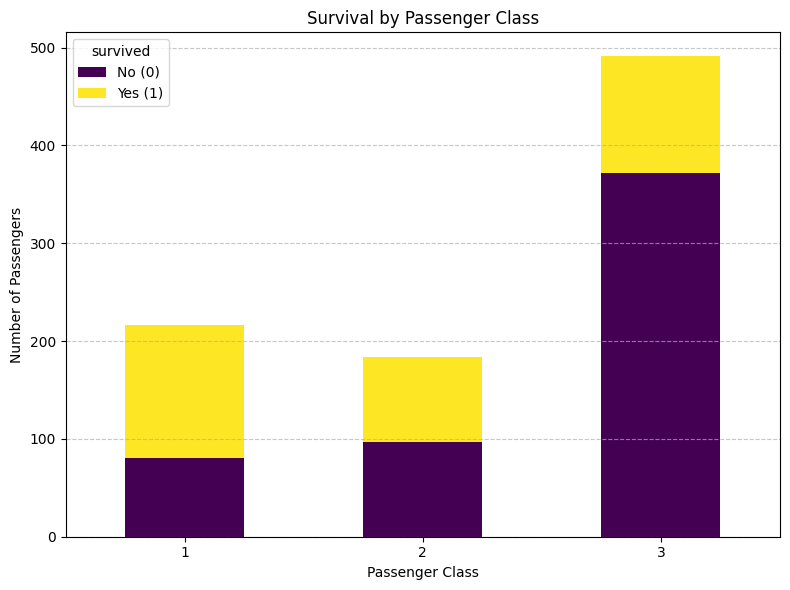

In [51]:
survival_counts=df.groupby(['pclass','survived']).size().unstack()

survival_counts.plot(kind='bar', stacked=True, colormap='viridis', figsize=(8, 6))

plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.legend(title='survived', labels=['No (0)', 'Yes (1)'])
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Jointplot between pclass and age

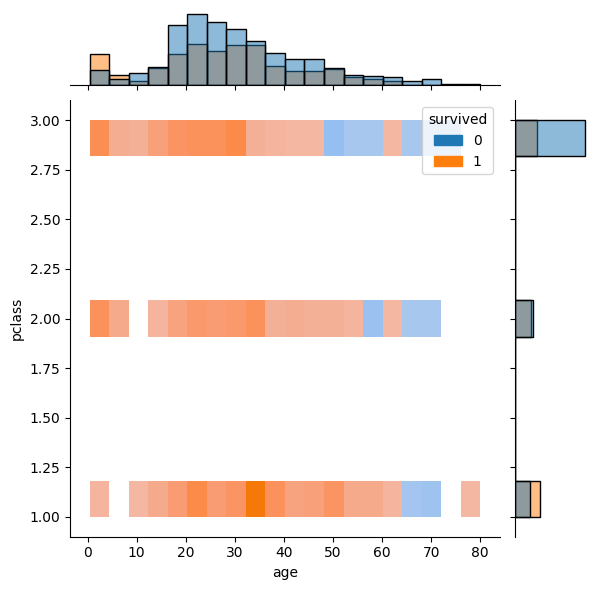

In [52]:
sns.jointplot(x='age',y='pclass',data=df,kind='hist',hue='survived')

# Jointplot between age and survived

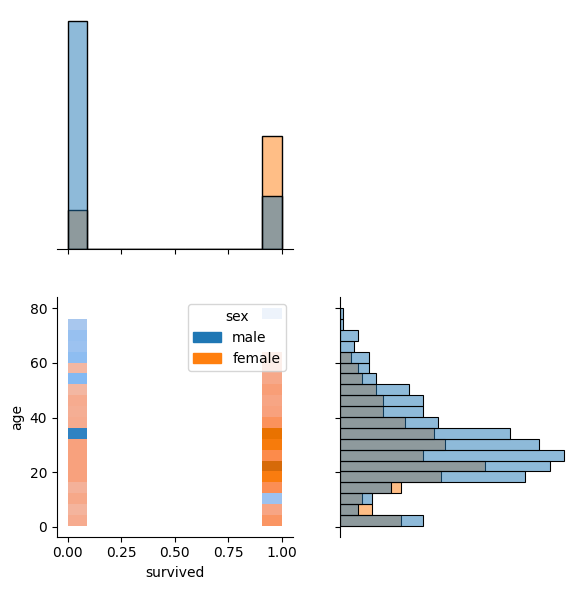

In [53]:
sns.jointplot(x='survived',y='age',data=df,kind='hist',ratio=1,hue='sex')

# Jointplot between age and fare

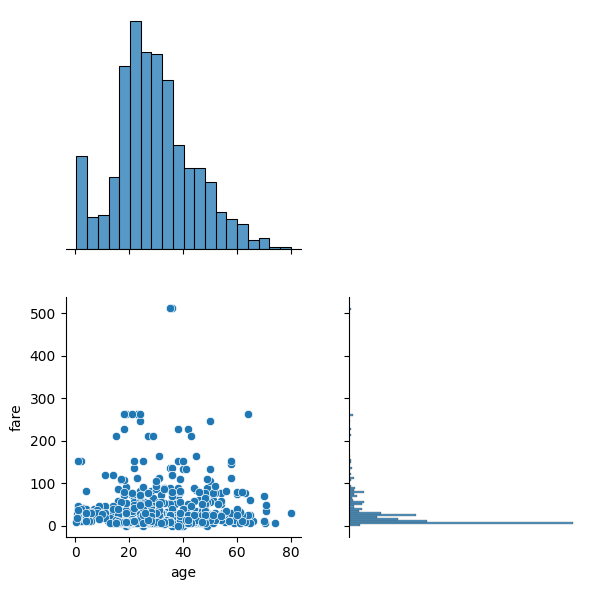

In [54]:
sns.jointplot(x='age',y='fare',data=df,kind='scatter',ratio=1)

In [55]:
df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_imputed,age_bin,fare_bin
64,0,1,male,NaN,0,0,27.7208,C,First,man,True,NaN,Cherbourg,no,True,29.699118,"(29.069, 30.66]","(20.493, 30.74]"
108,0,3,male,38.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True,38.000000,"(37.027, 38.618]","(-0.512, 10.247]"
850,0,3,male,4.0,4,2,31.2750,S,Third,child,False,NaN,Southampton,no,False,4.000000,"(3.603, 5.195]","(30.74, 40.986]"
376,1,3,female,22.0,0,0,7.2500,S,Third,woman,False,NaN,Southampton,yes,True,22.000000,"(21.111, 22.702]","(-0.512, 10.247]"
395,0,3,male,22.0,0,0,7.7958,S,Third,man,True,NaN,Southampton,no,True,22.000000,"(21.111, 22.702]","(-0.512, 10.247]"


# Lineplot between sex and pclass

<Axes: xlabel='sex', ylabel='pclass'>

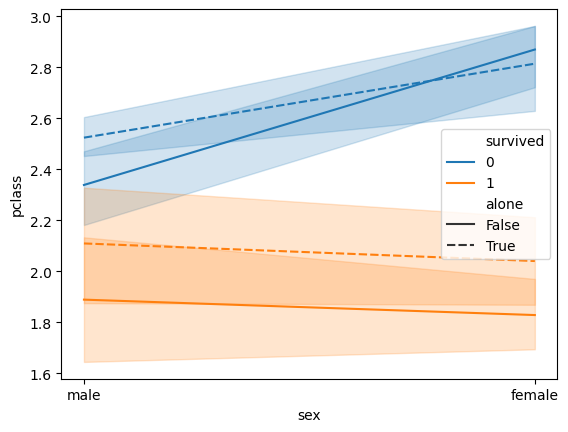

In [56]:
sns.lineplot(x='sex',y='pclass',hue='survived',data=df,style='alone')

# Boxplot between sex and age

<Axes: xlabel='sex', ylabel='age'>

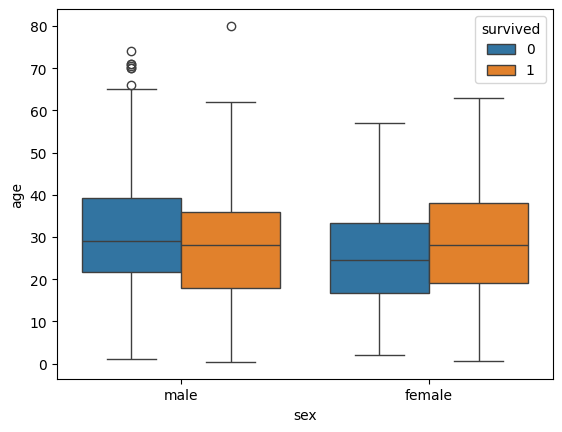

In [57]:
sns.boxplot(x='sex',y='age',data=df,hue='survived')

In [58]:
df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_imputed,age_bin,fare_bin
819,0,3,male,10.0,3,2,27.9000,S,Third,child,False,NaN,Southampton,no,False,10.000000,"(9.97, 11.561]","(20.493, 30.74]"
132,0,3,female,47.0,1,0,14.5000,S,Third,woman,False,NaN,Southampton,no,False,47.000000,"(46.576, 48.168]","(10.247, 20.493]"
454,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,29.699118,"(29.069, 30.66]","(-0.512, 10.247]"
834,0,3,male,18.0,0,0,8.3000,S,Third,man,True,NaN,Southampton,no,True,18.000000,"(17.928, 19.519]","(-0.512, 10.247]"
869,1,3,male,4.0,1,1,11.1333,S,Third,child,False,NaN,Southampton,yes,False,4.000000,"(3.603, 5.195]","(10.247, 20.493]"


/tmp/ipython-input-3780561493.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['fare'], kde=True,ax=axes[1,2])
/tmp/ipython-input-3780561493.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'].dropna(),kde=True,ax=axes[1,3])


<Axes: xlabel='age', ylabel='Density'>

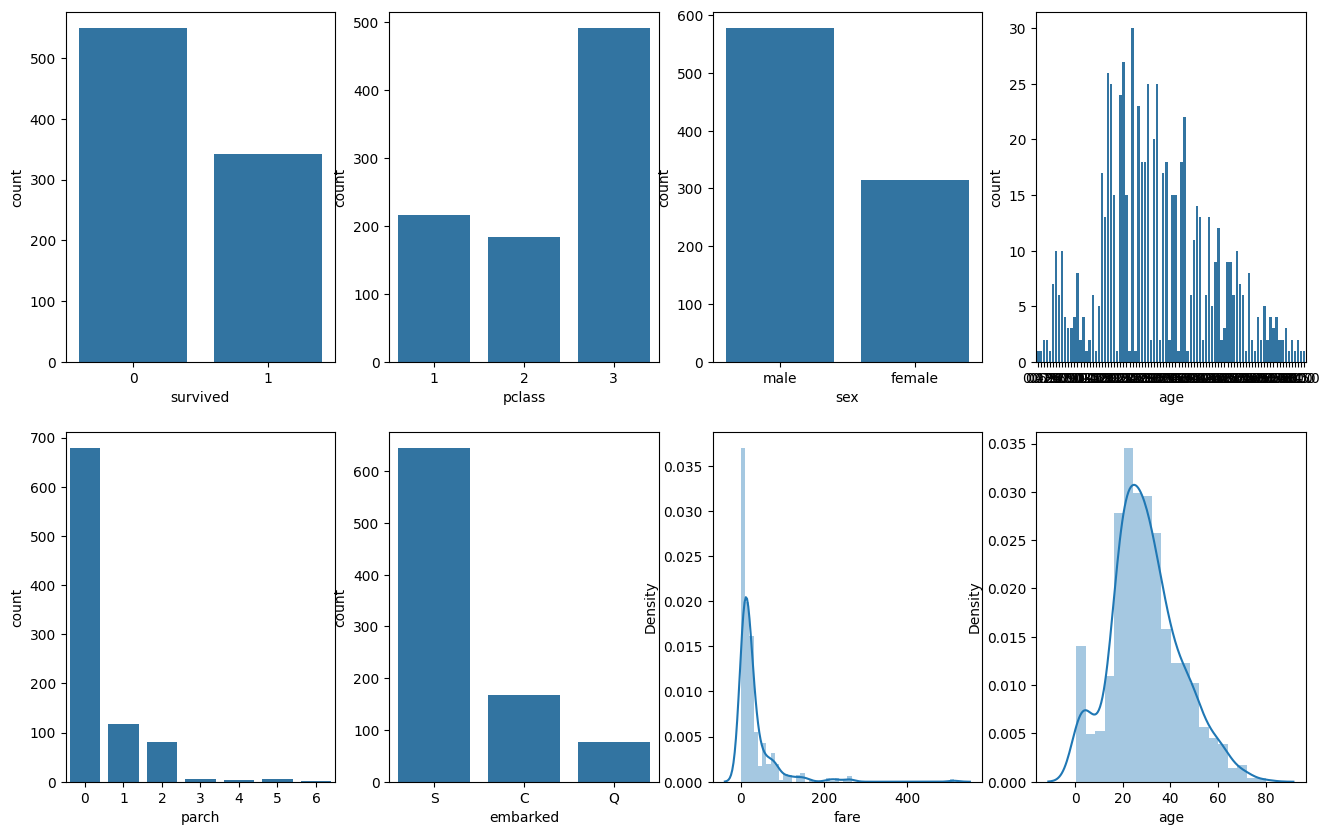

In [59]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
sns.countplot(x='survived',data=df,ax=axes[0,0])
sns.countplot(x='pclass',data=df,ax=axes[0,1])
sns.countplot(x='sex',data=df,ax=axes[0,2])
sns.countplot(x='age',data=df,ax=axes[0,3])
sns.countplot(x='parch',data=df,ax=axes[1,0])
sns.countplot(x='embarked',data=df,ax=axes[1,1])
sns.distplot(df['fare'], kde=True,ax=axes[1,2])
sns.distplot(df['age'].dropna(),kde=True,ax=axes[1,3])

<Axes: xlabel='sex', ylabel='age'>

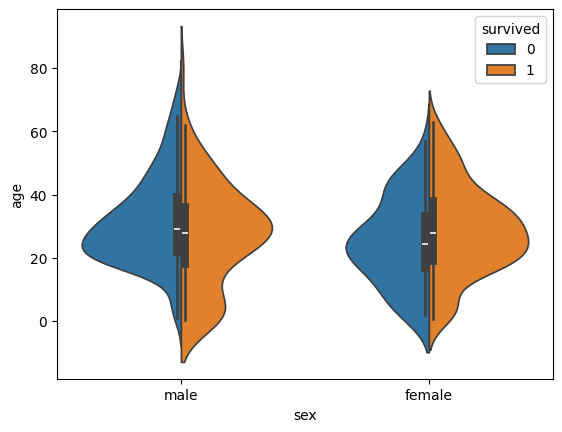

In [60]:
sns.violinplot(x ="sex", y ="age", hue ="survived",
data = df, split = True)